In [2]:
## 代码复现
import json
import math
import functools

from collections import defaultdict

import networkx as nx
import matplotlib
import matplotlib.pyplot as plt


coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

## get_city_info return city location {city_name: (lat, lng)}
def get_city_info(data):
    records = data.split('\n')
    
    city_locations = {}
    for record in records:
        if record == '':
            continue
        
        if record.endswith(','):
            record = record[:len(record)-1]

        city_info_list = record.strip('{}').split(':')
        name = city_info_list[1].split(',')[0].strip('\'')
        locs = tuple([float(x) for x in city_info_list[2].strip('[]').replace(' ', '').split(',')])
        city_locations[name] = locs
        
    return city_locations


city_locations = get_city_info(coordination_source)


def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d


def get_city_distance(city1, city2):
    loc1 = city_locations[city1]
    loc2 = city_locations[city2]
    return distance(loc1, loc2)


print(get_city_distance("杭州","上海"))

#%matplotlib inline

matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']

city_graph = nx.Graph()

city_graph.add_nodes_from(list(city_locations.keys()))
nx.draw(city_graph, city_locations, with_labels=True, node_size=10)

threshold = 700
def build_connection(city_list):
    connections = defaultdict(list)
    citys = list(city_list.keys())
    for c1 in citys:
        for c2 in citys:
            if c1 == c2: continue
            
            if get_city_distance(c1, c2) < threshold:
                connections[c1].append(c2)
                
    return connections

connections = build_connection(city_locations)
print("city connections: ", connections)

cities_connection_graph = nx.Graph(connections)
nx.draw(cities_connection_graph,city_locations,with_labels=True,node_size=10)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


153.5185697155768
city connections:  defaultdict(<class 'list'>, {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'], '嘉峪关': ['兰州', '西宁', '成都', '拉萨'], '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'], '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'], '石家庄': ['武汉', '郑州', '济南', '南京', '合肥', '南昌', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特'], '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'], '贵阳': ['兰州', '西宁', '成都', '拉萨', '海口', '西安', '重庆', '南宁', '银川'], '武汉': ['石家庄', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '海口', '太原', '西安', '北京', '天津', '呼和浩特', '香港', '澳门'], '郑州': ['石家庄', '武汉', '济南', '南京', '合肥', '南昌', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特', '香港', '澳门'], '济南': ['石家庄', '武汉', '郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '太原', '北京', '上海', '天津', '呼和浩特'], '南京': ['石家庄', '武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '长沙', '台湾', '北京', '上海', '天津'], '合肥': ['石家庄', '武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '广州', '长沙', '太原', '台湾', '北京', '上海', '天津', '香港', '澳门'], '杭州

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20848 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20848 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22025 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23786 missing from current font.
  font.set_text

In [35]:
def bfs_v1(graph, src, dest):
    path_list = [[src]]
    visited = set()
    
    while path_list:
        path = path_list.pop(0)
        frontier = path[-1]
        
        if frontier in visited:
            continue
        
        adjs = graph[frontier]
        for city in adjs:
            if city in path:
                continue
                
            new_path = path + [city]
            path_list.append(new_path)
            if city == dest:
                return new_path

        visited.add(frontier)
        
print(bfs_v1(cities_connection_graph,"北京","兰州"))

['北京', '石家庄', '西安', '兰州']


In [ ]:
def bfs_v2(graph, src, dest, search_strategy):
    path_list = [[src]]
    
    while path_list:
        path = path_list.pop(0)
        frontier = path[-1]
        
        successor = graph[frontier]
        for city in successor:
            if city in path: continue
                
            new_path = path + [city]
            path_list.append(new_path)
        
        path_list = search_strategy(path_list)
        
        if path_list and path_list[0][-1] == dest:
            return path_list[0]

def get_distance_of_path(path):
    return sum([get_city_distance(path[i], path[i+1]) for i in range(len(path)-1)])

def sort_by_distance(path_list):
    return sorted(path_list,key=get_distance_of_path)

print(get_distance_of_path(["北京","济南","上海"]))

print(bfs_v2(connections,"北京","上海",search_strategy=sort_by_distance))

## 问题
* 2.1 What conditions are required to make the BFS return the optimal solution

    reorder the pathes of city in each iteration.

* 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)
      tIDDFS combines depth-first search’s space-efficiency and breadth-first search’s fast search (for nodes closer to root). https://www.geeksforgeeks.org/iterative-deepening-searchids-iterative-deepening-depth-first-searchiddfs/
      

* 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
  
  when Time efficiency is more important, than BFS is better.
  when Memory is limited, DFS is better than BFS, because BFS consume more mem.
  
* 2.4 When can we use machine learning ?
    
    data change frequently and have No obvious patterns, for example spam email，Fraud detection

* 2.5 What is the gradient of a function

    梯度即函数在某一点最大的方向导数，函数沿梯度方向函数有最大的变化率


* 2.6 How can we find the maximum value of a function using the information of gradient
    
    

In [5]:
## 北京地铁, 线路查找

from bs4 import BeautifulSoup

class Station(object):
    def __init__(self, line, name, lat, lng):
        self.line = line
        self.name = name
        self.lat = lat
        self.lng = lng


def parse_stations():
    """
    https://blog.csdn.net/GISShiXiSheng/article/details/44976241
    """

    stations = defaultdict(list)

    with open("subway_data.txt") as f:
        data = f.read()
        soup = BeautifulSoup(data, 'lxml')  # Parse the HTML as a string
        table = soup.find_all('table')[0]  # Grab the first table

        line_name = ''
        for row in table.find_all('tr'):
            columns = row.find_all('td')
            if len(columns) == 1:
                line_name = columns[0].get_text()
                stations[line_name] = []
                continue

            if line_name == '':
                continue

            name, lat, lng = columns[1].get_text(), float(columns[3].get_text()), float(columns[4].get_text())
            stations[line_name].append(Station(line_name, name, lat, lng))

    return stations


station_info = {}


def build_station_graph(stations):
    graph = defaultdict(list)
    station_list = stations.values()
    for ss in station_list:
        for i, s in enumerate(ss):
            station_info[s.name] = s

            pre, back = None, None
            if i == 0:
                back = ss[i+1]
            elif i == len(ss)-1:
                pre = ss[i-1]
            else:
                pre, back = ss[i-1], ss[i+1]

            origin = graph[s.name]
            if pre and pre not in origin:
                graph[s.name].append(pre.name)
            if back and back not in origin:
                graph[s.name].append(back.name)

    return graph


def get_station_distance(s1, s2):
    st1, st2 = station_info[s1], station_info[s2]
    return distance((st1.lat, st1.lng), (st2.lat, st2.lng))


def shortest_path(station_graph, src, dest, search_strategy):
    path_list = [[src]]

    while path_list:
        path = path_list.pop(0)
        frontier = path[-1]

        successor = station_graph[frontier]
        for s in successor:
            if s in path:
                continue

            new_path = path + [s]
            path_list.append(new_path)

        path_list = search_strategy(path_list)
        if path_list and path_list[0][-1] == dest:
            return path_list[0]


def get_distance_of_path(path):
    return sum([get_station_distance(path[i], path[i + 1]) for i in range(len(path) - 1)])


def sort_by_distance(path_list):
    return sorted(path_list, key=get_distance_of_path)


def search(station_graph, src, dest):
    path = shortest_path(station_graph, src, dest, sort_by_distance)
    return path

stations = parse_stations()
graph = build_station_graph(stations)
path = search(graph, "海淀黄庄", "五道口")
print(path)

['海淀黄庄', '知春里', '知春路', '五道口']


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


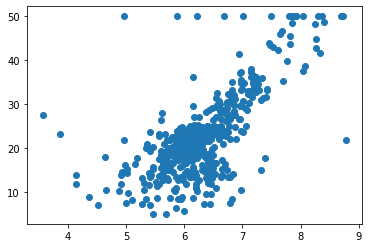

In [8]:
## 
from sklearn.datasets import load_boston
dataset = load_boston()

print(dataset.feature_names)
x,y=dataset['data'],dataset['target']

X_rm = x[:,5]
plt.scatter(X_rm,y)

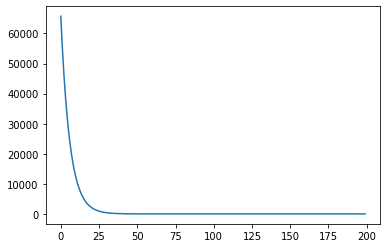

In [12]:
import random

def price(rm, k, b):
    return k * rm + b

def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3
iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate


best_k = k
best_b = b

plt.plot(list(range(iteration_num)),losses)

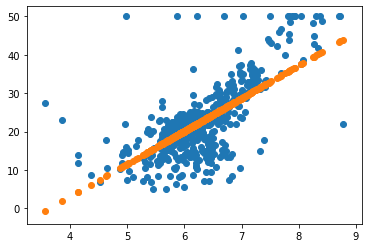

In [13]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)